# Programming Assignment I: Exploratory Analysis over TED Talks Dataset

## Student Details

When submitting, fill your name and ID in this cell. Note that this is a markdown cell.

Student Name and ID: Gadiraju Karthik Varma, 1001418350

# Assignment Details

In this assignment, you will conduct a guided exploration over TED Talks Dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on TED Talks dataset. This dataset contains information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED dataset contains information about all talks including number of views, number of comments, descriptions, speakers, and titles. 

### TED Talks Dataset
####  name: The official name of the TED Talk. Includes the title and the speaker.
#### title: The title of the talk
#### description: A short description of what the talk is about.
#### main_speaker: The first named speaker of the talk.
#### speaker_occupation: The occupation of the main speaker.
#### num_speaker: The number of speakers in the talk.
#### duration: The duration of the talk in seconds.
#### event: The TED/TEDx event where the talk took place.
#### published_date: The Unix timestamp for the publication of the talk on TED.com
#### comments: The number of first level comments made on the talk.
#### tags: The themes associated with the talk.
#### languages: The number of languages in which the talk is available.
#### url: The URL of the talk.
#### views: The number of views on the talk.

# Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [9]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
import re
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

#For some of the date operations
import datetime

# Reading Dataset
The Python code below reads the ted_talks dataset into a Pandas data frame with the name df_ted. 
For this code to work, the file 'ted_talks.csv' must be in the same folder as the notebook.

In [10]:
#read the csv file into a Pandas data frame
df_ted = pd.read_csv('ted_talks.csv', encoding='latin1')
#convert the Unix timestamps into a readable date format
df_ted['published_date'] = df_ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
#return the first 5 rows of the dataset
df_ted.head()

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [11]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.


#Task 1-a: Print the details of the df_ted data frame (information such as number of rows,columns, name of columns, etc)
print ("Task 1-a: Details of df_ted data frame are:", df_ted.info())


#Task 1-b: Find the number of rows and columns in the df_ted data frame.
num_rows = df_ted.shape[0]
num_cols = df_ted.shape[1]
print ("\n\nTask 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 


#Task 1-c: Print the descriptive details (min, max, quartiles etc) for 'duration' column of  the ted_talk
# duration: The duration of the talk in seconds.
print ("\n\nTask 1-c: Descriptive details of duration is \n", df_ted['duration'].describe().to_string())


#Task 1-d: Print the number of unique values for 'event' and 'languages' columns
num_uniq_event = df_ted['event'].nunique()
num_uniq_languages = df_ted['languages'].nunique()
print ("\n\nTask 1-d: The number of unique events :", num_uniq_event)
print ("Task 1-d: The number of unique languages :", num_uniq_languages)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 14 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(9)
memory usage: 279.0+ KB
Task 1-a: Details of df_ted data frame are: None


Task 1-b: Number of rows:2550 and number of columns:14


Task 1-c: Descriptive details of duration is 
 count    2550.000000
mean      826.510196
std       374.009138
min       135.000000
25%  

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. Then, we will apply ranking on the results for some tasks. Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [12]:
#Task 2-a: Find out the total number of comments for all talks in TED2016 and TED2017 events.
num_comments_ted2016 = df_ted[df_ted['event'] == 'TED2016']['comments'].sum()
num_comments_ted2017 = df_ted[df_ted['event'] == 'TED2017']['comments'].sum()
print ("Task 2-a: The total number of comments on talks in TED2016 is %s and in TED2017 is %s" 
       % (num_comments_ted2016, num_comments_ted2017))


#Task 2-b: Find out the total number of talks in 2015, 2016, and 2017.
#Let us create a new column for 'year' by using 'published_date' column
df_ted['year'] = df_ted['published_date'].apply(lambda x: x.split('-')[2])
num_talks_2015 = df_ted[df_ted['year'] == '2015']['tags'].count()
num_talks_2016 = df_ted[df_ted['year'] == '2016']['tags'].count()
num_talks_2017 = df_ted[df_ted['year'] == '2017']['tags'].count()
print ("\n\nTask 2-b: The total number of talks in 2015 is %s, in 2016 is %s, and in 2017 is %s" 
       % (num_talks_2015, num_talks_2016, num_talks_2017))


#Task 2-c: Let us now use multiple filtering criteria
# Find out the total number of talks in 2012 and 2014 with at least 15 mins duration and 500 views.
num_talks_2012 = df_ted[(df_ted['year'] == '2012') & (df_ted['duration'] >= 900) & (df_ted['views'] >= 500)]['views'].count()
num_talks_2014 = df_ted[(df_ted['year'] == '2014') & (df_ted['duration'] >= 900) & (df_ted['views'] >= 500)]['views'].count()
print ("\n\nTask 2-c: The total number of talks that meet the given conditions in 2012 is %s and in 2014 is %s" 
       % (num_talks_2012, num_talks_2014))


#Task 2-d: Find out 5 least viewed talks in 2016 and 2017 and print their titles and number of views.
top5_least_viewed_2016 = df_ted[['title','views']].where(df_ted['year'] == '2016').nsmallest(5, 'views').to_string(index=False)
top5_least_viewed_2017 = df_ted[['title','views']].where(df_ted['year'] == '2017').nsmallest(5, 'views').to_string(index=False)
print ("\n\nTask 2-d: \nThe top 5 least viewed talk in 2016: \n%s \n\nThe top 5 least viewed talk in 2016: \n%s" 
                     % (top5_least_viewed_2016,top5_least_viewed_2017))


#Task 2-e: Find out 10 most commented talks in 2010 and print their titles and number of comments.
top10_most_commented_2010 = df_ted[['title','comments']].where(df_ted['year'] == '2010').nlargest(10, 'comments').to_string(index=False)
print ("\n\nTask 2-e: \nThe top 10 most commented talk in 2010: \n%s" 
                     % (top10_most_commented_2010))


#Task 2-f: Find out Top-10 events with the most number of talks
top10_events_talks = df_ted['event'].value_counts().nlargest(10).to_string()
print ("\n\nTask 2-f: \nThe top 10 events with the most number of talks: \n%s" 
                     % (top10_events_talks))


Task 2-a: The total number of comments on talks in TED2016 is 6933 and in TED2017 is 3194


Task 2-b: The total number of talks in 2015 is 220, in 2016 is 243, and in 2017 is 197


Task 2-c: The total number of talks that meet the given conditions in 2012 is 116 and in 2014 is 80


Task 2-d: 
The top 5 least viewed talk in 2016: 
title     views
How Argentina's blind soccer team became champ...  443773.0
          Ballroom dance that breaks gender roles  571009.0
               The deadly legacy of cluster bombs  645572.0
                                   "Space Oddity"  738590.0
 How I'm discovering the secrets of ancient texts  761052.0 

The top 5 least viewed talk in 2016: 
title     views
                    A dance to honor Mother Earth  182975.0
    Would you live in a floating city in the sky?  248411.0
What intelligent machines can learn from a sch...  375647.0
Why journalists have an obligation to challeng...  383080.0
How a video game might help us build better ci...  39172

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

In [ ]:
#Run the below JS code to remove scroll from diagrams

In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Total number of TED events hosted per year:


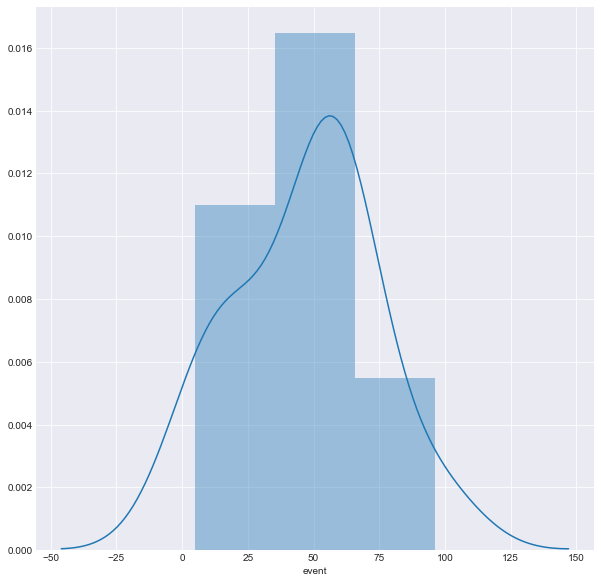

Total number of talks given per year:


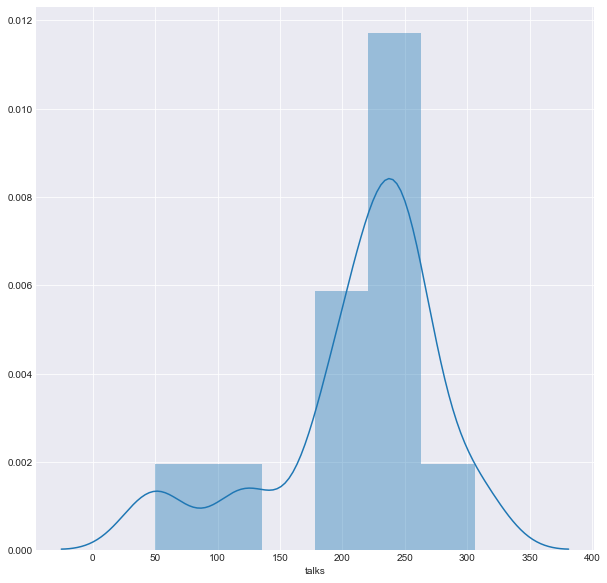

Total number of views per year:


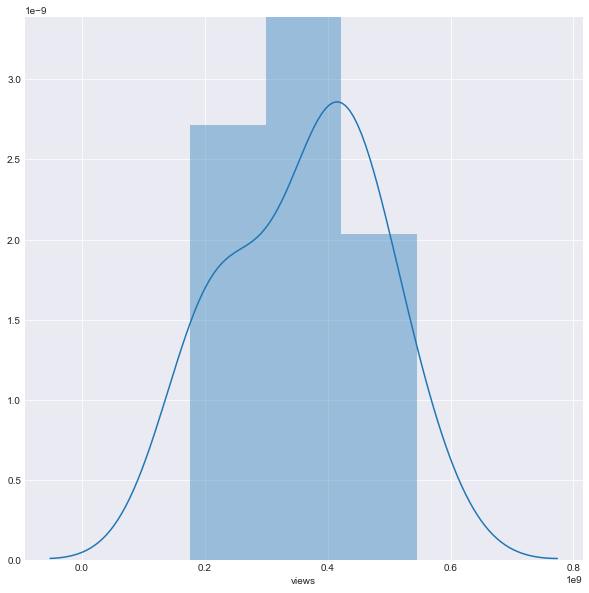

Top-10 main_speakers based on the number of comments:


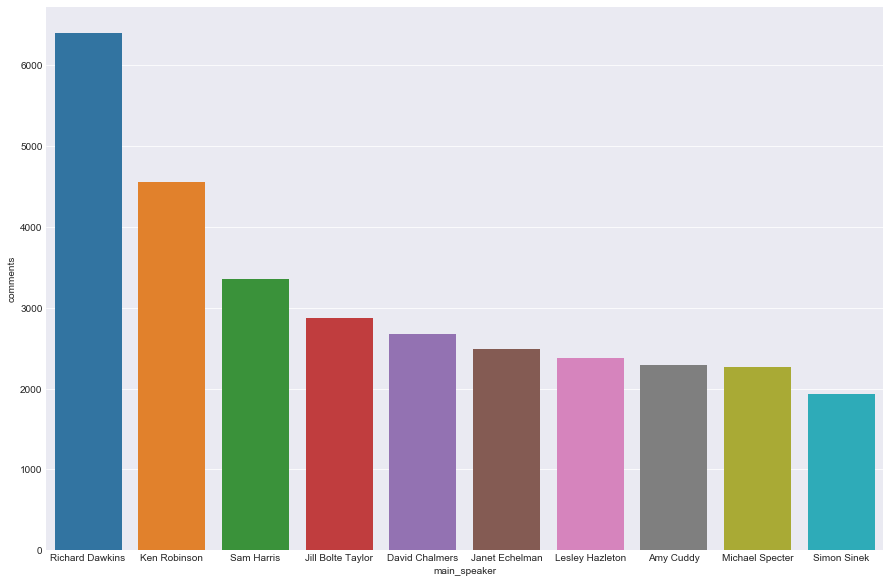

Top-10 main_speakers based on the number of views:


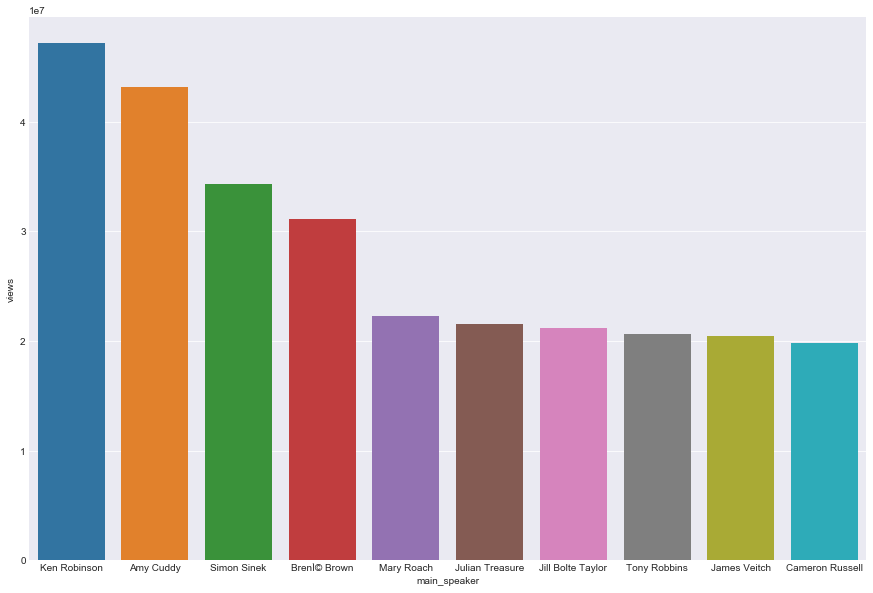

Scatter plot for average number of views per duration of talk in minutes:


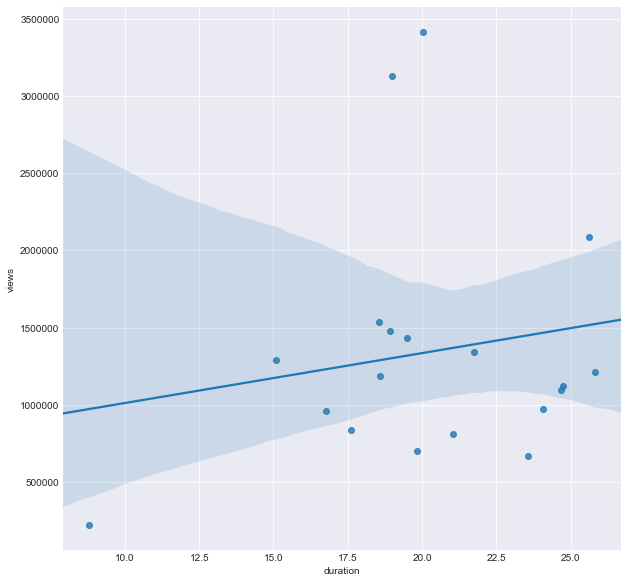

Line chart showing how the number of languages in average varied every year:


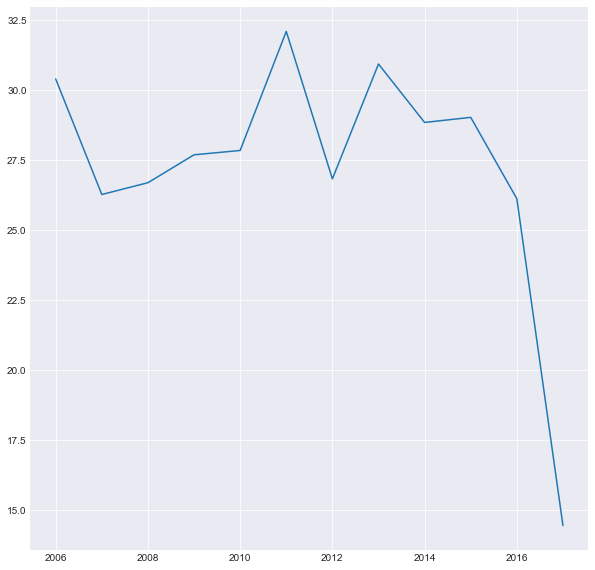

Horizontal bar chart for the top-10 most common occupation for main_speaker:


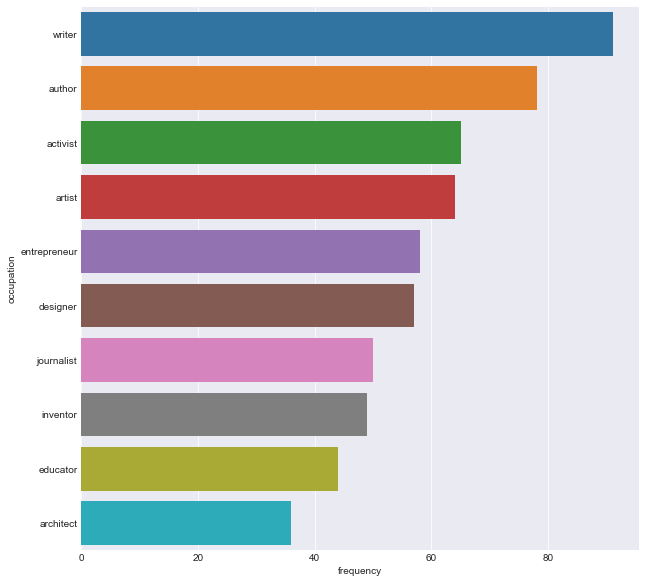

Horizontal bar chart for the top-10 most common themes:


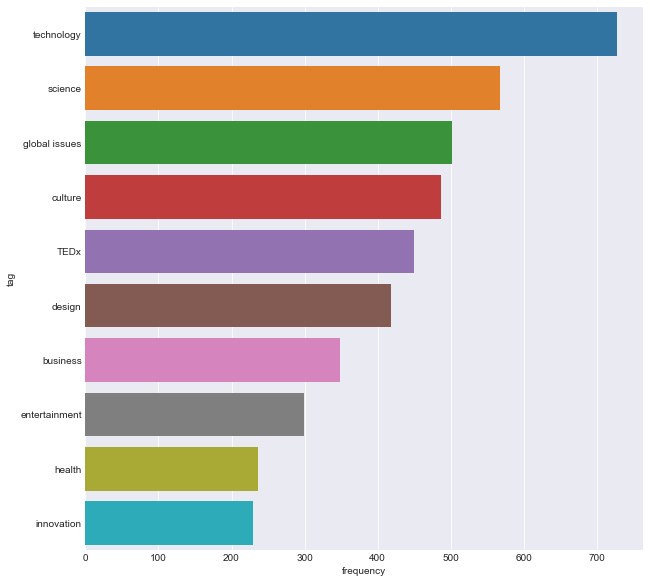

In [14]:
#Task 3-a: Draw a histogram for total number of TED events hosted per year.
#########################begin code for Task 3-a
%matplotlib inline
print('Total number of TED events hosted per year:')
events_per_year = pd.DataFrame(columns=['year','event'])
events_per_year['event'] = df_ted['event'].groupby(df_ted['year']).nunique()
events_per_year['year'] = df_ted['year'].unique()
#sns.barplot(x='year', y='event', data=events_per_year)
plt.figure(figsize=(10,10))
sns.distplot(events_per_year['event'])
plt.show()
#########################end code for Task 3-a


#Task 3-b: Draw a histogram for total number of talks given per year.
#########################begin code for Task 3-b
print('Total number of talks given per year:')
talks_per_year = pd.DataFrame(columns = ['talks', 'year'])
talks_per_year['talks'] = df_ted['name'].groupby(df_ted['year']).count()
talks_per_year['year'] = df_ted['year'].unique()
#sns.barplot(x='year', y='talks', data=talks_per_year)
plt.figure(figsize=(10,10))
sns.distplot(talks_per_year['talks'])
plt.show()
#print(df_ted.groupby([df_ted['year']]).count())
#########################end code for Task 3-b

#Task 3-c: Draw a histogram for total number of views per year.
#########################begin code for Task 3-c
print('Total number of views per year:')
views_per_year = pd.DataFrame(columns = ['views', 'year'])
views_per_year['views'] = df_ted['views'].groupby(df_ted['year']).agg('sum')
views_per_year['year'] = df_ted['year'].unique()
#sns.barplot(x='year', y='views', data=views_per_year)
plt.figure(figsize=(10,10))
sns.distplot(views_per_year['views'])
plt.show()
#########################end code for Task 3-c


#Task 3-d: Draw a "vertical" bar chart that lists the top-10 main_speakers based on the number of comments.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-d
print('Top-10 main_speakers based on the number of comments:')
comment_top_ten = pd.DataFrame(columns=['speaker', 'no_of_comments'])
comment_top_ten = df_ted[['main_speaker', 'comments']].sort_values('comments', ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='main_speaker', y='comments', data=comment_top_ten)
plt.show()
#########################end code for Task 3-d


#Task 3-e: Now repeat Task 3-d based on views (again top-10)
#########################begin code for Task 3-e
print('Top-10 main_speakers based on the number of views:')
views_top_ten = pd.DataFrame(columns = ['speaker'])
views_top_ten = df_ted[['main_speaker', 'views']].sort_values('views', ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='main_speaker', y='views', data=views_top_ten)
plt.show()
#########################end code for Task 3-e


#Task 3-f: Draw a scatter plot for average number of views per duration of talk in minutes.
# Notice that duration of talk is given in seconds. You need to convert it to minutes.
#########################begin code for Task 3-f
print('Scatter plot for average number of views per duration of talk in minutes:')
time = pd.DataFrame(columns = ['duration','views'])
time['duration'] = df_ted['duration'] / 60
time['views'] = df_ted.groupby(time['duration'])['views'].mean()
plt.figure(figsize=(10,10))
sns.regplot(x='duration', y='views', data=time, scatter=True)
plt.show()
#########################end code for Task 3-f


#Task 3-g: Draw a line chart showing how the number of languages in average varied every year
# X-axis : year, Y-axis : the number of languages in which the talk is available
#########################begin code for Task 3-g
print('Line chart showing how the number of languages in average varied every year:')
language = pd.DataFrame(columns=['avg_lang','years'])
language['years'] = df_ted['year'].unique()
a = df_ted['languages'].groupby(df_ted['year']).mean()
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.plot(language['years'], a)
plt.show()
#########################end code for Task 3-g


#Task 3-h: Draw a 'horizontal' bar chart for the top-10 most common occupation for main_speaker. 
#Notice that you need to use "speaker_occupation" field of your daset and the value of this field is given an array.
#########################begin code for Task 3-h
print('Horizontal bar chart for the top-10 most common occupation for main_speaker:')
occ = pd.DataFrame(columns = ['occupation_tag'])
occ['occupation_tag'] = df_ted['speaker_occupation'].apply(lambda x: str(x).lower().strip())
occ['occupation_tag'] = occ['occupation_tag'].apply(lambda x: re.split(',\s|;\s|\sand\s', x))
all_occ = {}
for talk in occ['occupation_tag']:
    for occ in talk:
        if not occ in all_occ:
            all_occ[occ] = 1
        else:
            all_occ[occ] += 1
            
occ_df = pd.DataFrame.from_dict(all_occ, orient = 'index').reset_index()
occ_df.columns = ['occupation','frequency']
top_occupations = occ_df.sort_values('frequency', ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x='frequency', y='occupation', data=top_occupations)
plt.show()
#########################end code for Task 3-h


#Task 3-i: Draw a 'horizontal' bar chart for the top-10 most common themes. 
#Notice that you need to use the 'tag' column of your dataset and value of this column is given an array.
#########################begin code for Task 3-i
print('Horizontal bar chart for the top-10 most common themes:')
all_tags = {}
test = df_ted['tags'].apply(lambda x:eval(str(x)))
for tall in test:
    for tag in tall:
        if not tag in all_tags:
            all_tags[tag] = 1
        else:
            all_tags[tag] += 1

tag = pd.DataFrame.from_dict(all_tags, orient= 'index').reset_index()
tag.columns = ['tag','frequency']
tag = tag.sort_values('frequency', ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x='frequency', y='tag', data=tag)
plt.show()
#########################end code for Task 3-i





# Task 4: 
Find out an interesting information from your ted_talks dataset. Create a visualization for it. 
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visulization). 

Number of ted talks published per month


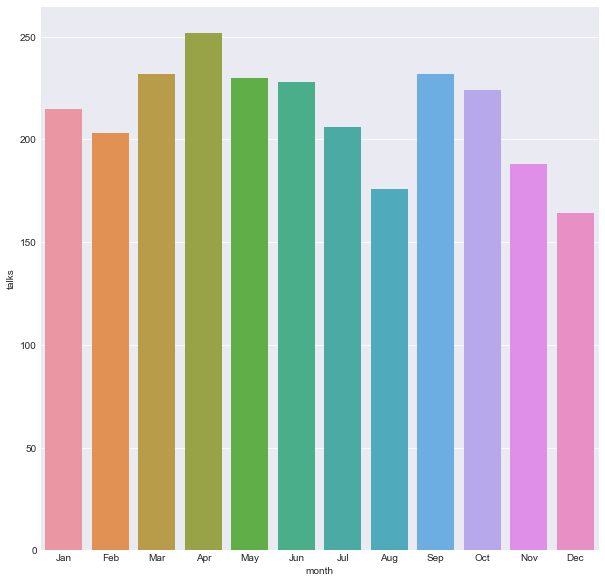

Most number of Ted Talks are published on April and the least are given in December

The Days of the week Ted Talks are Published


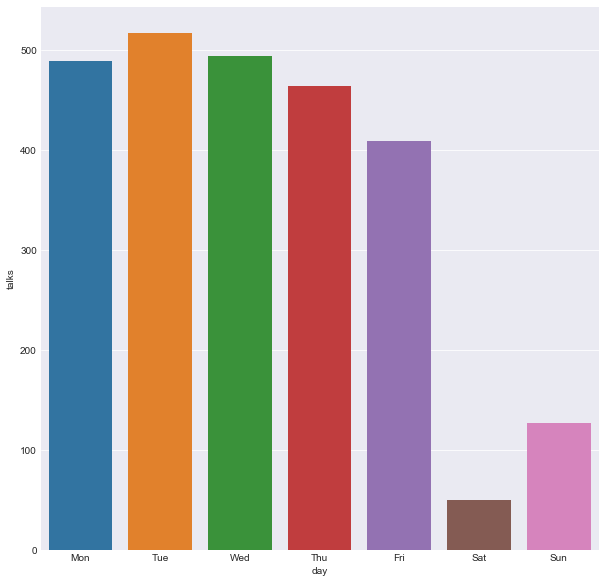

As we can observe most of the Ted Talks are published during the weekend and barely anything is published on weekdays with saturday being the least published day 

The most frequently appearing speakers are:


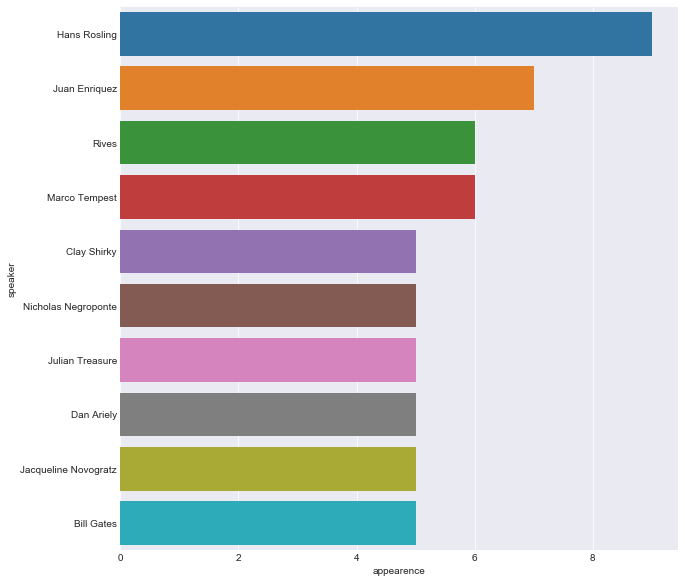

The most frequently appearing speaker is Hans Rosling with 9 appearances
Juan Enriquez is the second with 7 appearances 

Number of speakers per talk:

   index  num_speaker
0      1         2492
1      2           49
2      3            5
3      4            3
4      5            1

Almost every talk has only one speaker

Ted talk with the highest number of languages:
                                          name    views  languages
973  Matt Cutts: Try something new for 30 days  8838874         72
Ted talk with the most number of language translations is Matt Cutts: Try something new for 30 days
Lets see if it is also the highest viewed talk:

                                        name     views  languages
0  Ken Robinson: Do schools kill creativity?  47227110         60

The highest viewed ted talk is Ken Robinson: Do schools kill creativity? with only 60 languages so having more languages does not equal more views


In [15]:
#########################begin code for Task 4
order_of_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
order_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
######################################
#Number of ted talks published per month
######################################
print('Number of ted talks published per month')
df_ted['month'] = df_ted['published_date'].apply(lambda x: order_of_months[int(x.split('-')[1]) - 1])
month = pd.DataFrame(df_ted['month'].value_counts().reset_index())
month.columns = ['month', 'talks']
plt.figure(figsize=(10,10))
sns.barplot(x='month', y='talks', data= month, order=order_of_months)
plt.show()
#print(month)
print('Most number of Ted Talks are published on April and the least are given in December\n')

######################################
#Days of the week Ted Talks are Published
######################################
def day_of_month(dmy):
    day, month, year = (int(i) for i in dmy.split('-'))    
    y = datetime.date(year, month, day).weekday()
    return order_of_days[y]

print('The Days of the week Ted Talks are Published')
df_ted['day'] = df_ted['published_date'].apply(day_of_month)
df_day = pd.DataFrame(df_ted['day'].value_counts()).reset_index()
df_day.columns = ['day', 'talks']
plt.figure(figsize=(10,10))
sns.barplot(x='day', y='talks', data=df_day, order=order_of_days)
plt.show()

print('As we can observe most of the Ted Talks are published during the weekend and barely anything is published on weekdays with saturday being the least published day \n')


######################################
#most frequently appearing speaker
######################################
print('The most frequently appearing speakers are:')
speakers = df_ted.groupby('main_speaker').count().reset_index()[['main_speaker','views']]
speakers = speakers.sort_values('views', ascending=False).head(10)
speakers.columns = ['speaker', 'appearence']
plt.figure(figsize=(10,10))
sns.barplot(x='appearence', y='speaker', data=speakers)
plt.show()
print('The most frequently appearing speaker is Hans Rosling with 9 appearances')
print('Juan Enriquez is the second with 7 appearances \n')

######################################
#Number of speakers per talk
######################################
print('Number of speakers per talk:\n')
print(df_ted['num_speaker'].value_counts().reset_index())
print('\nAlmost every talk has only one speaker')

######################################
#Ted talk with the highest number of languages
######################################
print('\nTed talk with the highest number of languages:')
most_lang = df_ted.sort_values('languages', ascending=False)[['name','views','languages']].head(1)
print(most_lang)
print('Ted talk with the most number of language translations is Matt Cutts: Try something new for 30 days')
print('Lets see if it is also the highest viewed talk:\n')
highest_viewed = df_ted.sort_values('views', ascending=False)[['name','views','languages']].head(1)
print(highest_viewed)
print('\nThe highest viewed ted talk is Ken Robinson: Do schools kill creativity? with only 60 languages so having more languages does not equal more views')
#########################end code for Task 4

# Grading

Task 1: 10 points
Task 2: 30 points
Task 3: 40 points
Task 4: 20 points
